#### Digital Signal Processing Courseware: An Introduction (copyright © 2024)
## Authors: J. Christopher Edgar and Gregory A. Miller

Originally written in Mathematica by J. Christopher Edgar. Conversion to Jupyter Notebook by Song Liu.

The authors of this courseware are indebted to Prof. Bruce Carpenter (University of Illinois Urbana-Champaign). Bruce inspired the creation of this courseware, he consulted with the authors as this courseware was being developed, and he provided the original version of the code and text for several sections of this courseware (e.g. the section on complex numbers and the section on normal distributions). 

# <font color=red>The Fourier Transform</font>

# <font color=red>Give it a Try</font>
# <font color=red>Part 3</font>

### Setup

In [1]:
# general imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import math

import warnings
warnings.filterwarnings('ignore')

# Figure size and general parameters
plt.rc("figure", figsize=(8, 6))

#function to create time course figure
#one waveform
def make_plot_1(x1,y1,type="b"): 
    plt.plot(x1, y1,type)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
#two overlaid waveforms with red and blue   
def make_plot_2(x1,y1,type1,x2,y2,type2): 
    plt.plot(x1, y1, type1)
    plt.plot(x2, y2, type2)
    plt.margins(x=0, y=0)
    plt.axhline(y=0, color='k')
    plt.tick_params(labelbottom = False, bottom = False)
    
DURATION = 1    
#function to create frequency domain figure
#one waveform
def make_plot_freq_1(x1,SAMPLE_RATE): 
    N = SAMPLE_RATE * DURATION
    Nhalf = math.ceil(N/2)
    yf = fft(x1)
    xf = fftfreq(N, 1 / SAMPLE_RATE)
    yf = yf[0:Nhalf]
    xf = xf[0:Nhalf]
    plt.plot(xf, np.abs(yf)) 
    
def round_complex(x):
    return complex(np.round(x.real,4),np.round(x.imag,4))

## <font color=red>DSP.06.G3) Filtering Using the Forward and Inverse Fourier Transform</font>

### <font color=red>DSP.06.G3.a) Filtering via Fourier Transforms</font>

Lessons 3 and 4 examined filtering via the use of convolution. There are, however, many different
filtering techniques. All, however, involve removing a portion of the recorded signal - either activity that
is considered noise (e.g., 60 Hz activity) or some signal components, to help focus on others.

Here is a filtering method based on the Discrete Fourier Transform:

First, a Direct Fourier Transform (DFT) converts the original timeseries into the frequency domain.

Second, the elements of the DFT that correspond to frequencies to be eliminated are set to zero.

Third, an Inverse Fourier Transform recreates the original timeseries, minus those frequencies set to
zero.

Give it a try. Consider the following timeseries and frequency plot.

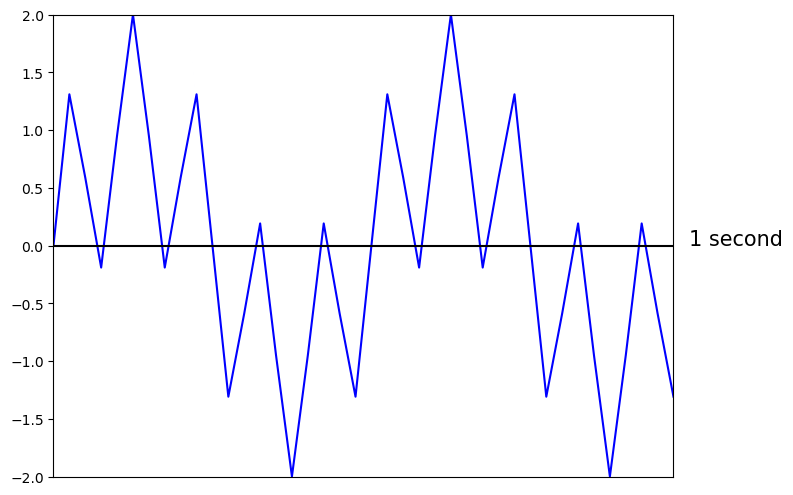

In [2]:
time = np.arange(0,1,1/40)
timeseries = np.sin(2*np.pi * 10 * time) + np.sin(2*np.pi * 2 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 second',fontsize=15)
plt.show()

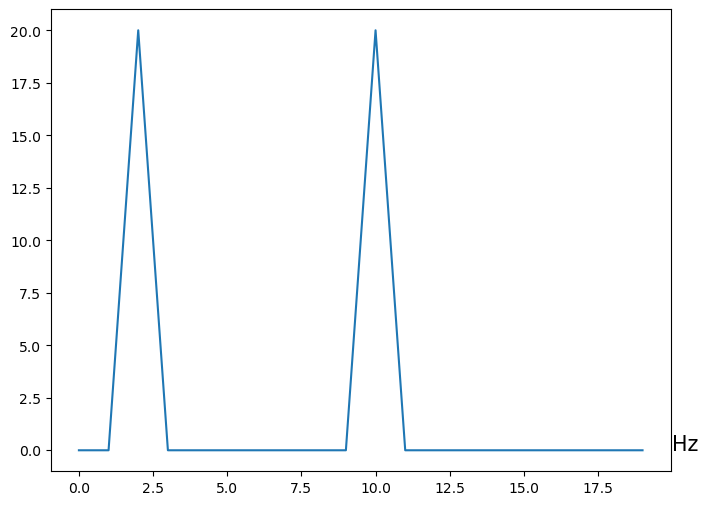

In [3]:
make_plot_freq_1(timeseries,40)

# Adding text to the figure
plt.text(20,0,'Hz',fontsize=15)
plt.show()

Peaks at 2 and 10 Hz are observed. Suppose the 2 Hz activity is regarded as unwanted noise. Can we use the procedure outlined above to
remove 2 Hz activity?

Answer: Sure. Here are the steps:

First, a Direct Fourier Transform (DFT) converts the original timeseries into the frequency domain.

Second, the elements of the DFT that correspond to frequencies to be eliminated are set to zero.

Third, an Inverse Fourier Transform recreates the original time series, minus those frequencies set to
zero.

Apply the steps one at a time.

First, examine the output of the DFT and find the element corresponding to 2 Hz activity. Remember
that the first number in the vector represents the mean (DC offset), the second number the first frequency,
the third number the second frequency, etc... Because the epoch length is 1 second, each
frequency bin represents activity in 1 Hz steps.

In [4]:
yf = fft(timeseries)
yf2 = []
for xx in yf:
   yf2.append(round_complex(xx))
yf2

[-0j,
 (-0+0j),
 (-0-20j),
 -0j,
 -0j,
 0j,
 (-0+0j),
 -0j,
 (-0+0j),
 (-0+0j),
 -20j,
 (-0+0j),
 -0j,
 0j,
 (-0-0j),
 (-0-0j),
 -0j,
 0j,
 (-0+0j),
 (-0-0j),
 -0j,
 (-0+0j),
 (-0-0j),
 -0j,
 0j,
 (-0+0j),
 (-0+0j),
 -0j,
 0j,
 (-0-0j),
 20j,
 (-0-0j),
 (-0-0j),
 0j,
 (-0-0j),
 -0j,
 0j,
 0j,
 (-0+20j),
 (-0-0j)]

In [5]:
len(yf2)

40

Next, set the elements corresponding to 2 Hz activity to zero.

In [6]:
yf2[2] = 0
yf2[38] = 0
yf2

[-0j,
 (-0+0j),
 0,
 -0j,
 -0j,
 0j,
 (-0+0j),
 -0j,
 (-0+0j),
 (-0+0j),
 -20j,
 (-0+0j),
 -0j,
 0j,
 (-0-0j),
 (-0-0j),
 -0j,
 0j,
 (-0+0j),
 (-0-0j),
 -0j,
 (-0+0j),
 (-0-0j),
 -0j,
 0j,
 (-0+0j),
 (-0+0j),
 -0j,
 0j,
 (-0-0j),
 20j,
 (-0-0j),
 (-0-0j),
 0j,
 (-0-0j),
 -0j,
 0j,
 0j,
 0,
 (-0-0j)]

Finally, apply the inverse Fourier transform to recreate the original timeseries, minus those frequencies
for which the direct transform was set to zero.

In [7]:
from scipy.fft import ifft

timeseries2 = ifft(yf2)
timeseries2

array([ 0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
       -1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,
        0.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,
        1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,
        0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
       -1.+0.j,  0.+0.j,  1.+0.j,  0.+0.j, -1.+0.j])

Now plot the filtered timeseries.

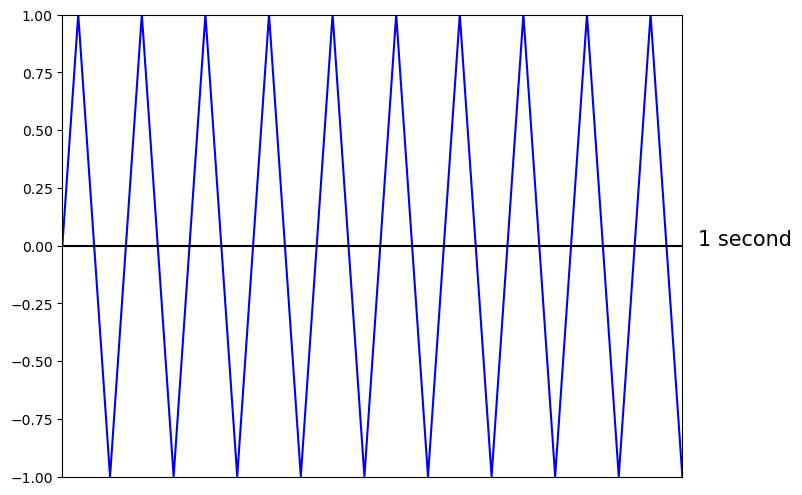

In [8]:
make_plot_1(time,timeseries2)
plt.text(1,0,'1 second',fontsize=15)
plt.show()

And finally, compare the unfiltered and filtered timeseries.

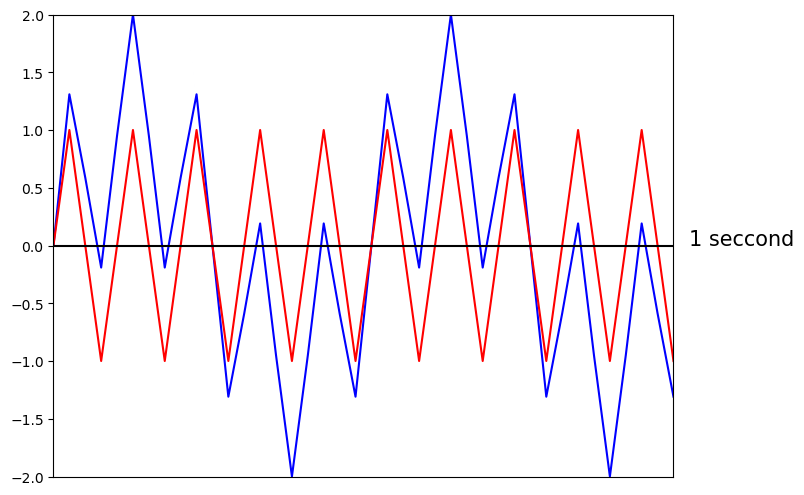

In [9]:
make_plot_2(time,timeseries,'b',time,timeseries2,'r')

plt.text(1,0,'1 seccond',fontsize=15)
plt.show()

In red we see just a 10 Hz time series. Looks like we successfully removed 2 Hz activity.

### <font color=red>DSP.06.G3.b) Filtering via Fourier Transforms</font>

Now you give it a try.

Consider the following timeseries and the frequency plot.

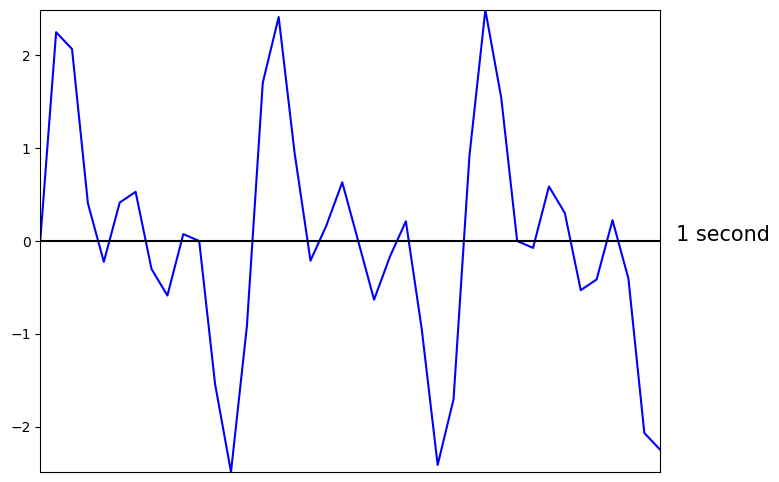

In [10]:
time = np.arange(0,1,1/40)
timeseries = np.sin(2*np.pi * 3 * time) + np.sin(2*np.pi * 6 * time) + np.sin(2*np.pi * 9 * time)

make_plot_1(time,timeseries)
plt.text(1,0,'1 second',fontsize=15)
plt.show()

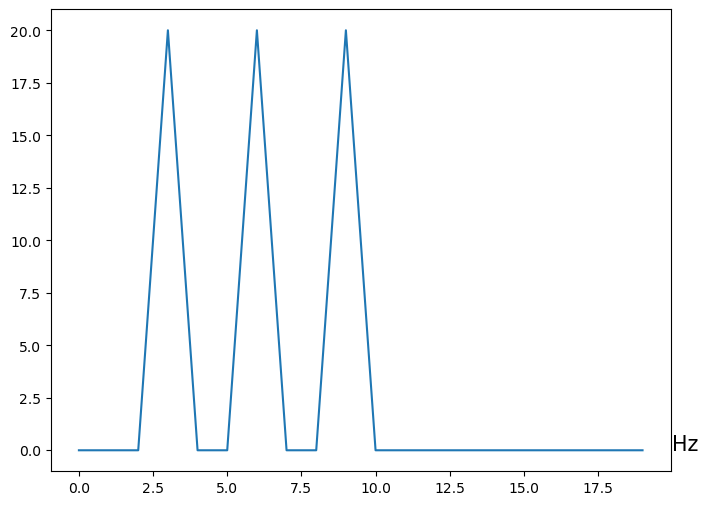

In [11]:
make_plot_freq_1(timeseries,40)

# Adding text to the figure
plt.text(20,0,'Hz',fontsize=15)
plt.show()

Suppose we want to examine only 3 and 9 Hz activity. Use the procedure outlined above to remove the
6 Hz 'noise' activity.

Remember, here are the three steps :
    
First, a Direct Fourier Transform (DFT) converts the original timeseries into the frequency domain.

Second, the elements of the DFT that correspond to frequencies to be eliminated are set to zero.

Third, an Inverse Fourier Transform recreates the original time series, minus those frequencies set to
zero.